# 8a

In [1]:
#imports and setup
import seaborn as sns
import matplotlib.pyplot as plt

import pandas as pd

%matplotlib inline
pd.set_option('precision',2) #number precision for pandas
pd.set_option('display.float_format','{:20,.2f}'.format) #get rid of scientific notation 不用科学计数法
pd.set_option('display.max_rows',10)
plt.style.use('seaborn') #默认使用seaborn画图

In [3]:
college = pd.read_csv('/Users/appler/Desktop/ISLR/College.csv')
college.head(2)

Unnamed: 0 Private  Apps  Accept  Enroll  Top10perc  \
0  Abilene Christian University     Yes  1660    1232     721         23   
1            Adelphi University     Yes  2186    1924     512         16   

   Top25perc  F.Undergrad  P.Undergrad  Outstate  Room.Board  Books  Personal  \
0         52         2885          537      7440        3300    450      2200   
1         29         2683         1227     12280        6450    750      1500   

   PhD  Terminal            S.F.Ratio  perc.alumni  Expend  Grad.Rate  
0   70        78                18.10           12    7041         60  
1   29        30                12.20           16   10527         56

# 8b

In [5]:
#re-read data column with the first column as index
college=pd.read_csv('/Users/appler/Desktop/ISLR/College.csv',index_col = 0)

In [6]:
college.head(2)

Private  Apps  Accept  Enroll  Top10perc  \
Abilene Christian University     Yes  1660    1232     721         23   
Adelphi University               Yes  2186    1924     512         16   

                              Top25perc  F.Undergrad  P.Undergrad  Outstate  \
Abilene Christian University         52         2885          537      7440   
Adelphi University                   29         2683         1227     12280   

                              Room.Board  Books  Personal  PhD  Terminal  \
Abilene Christian University        3300    450      2200   70        78   
Adelphi University                  6450    750      1500   29        30   

                                        S.F.Ratio  perc.alumni  Expend  \
Abilene Christian University                18.10           12    7041   
Adelphi University                          12.20           16   10527   

                              Grad.Rate  
Abilene Christian University         60  
Adelphi University                   56

# 8c Produce numerical summary of variables in the dataset

In [6]:
college.describe(include='all')

Private                 Apps               Accept               Enroll  \
count      777               777.00               777.00               777.00   
unique       2                  nan                  nan                  nan   
top        Yes                  nan                  nan                  nan   
freq       565                  nan                  nan                  nan   
mean       NaN             3,001.64             2,018.80               779.97   
...        ...                  ...                  ...                  ...   
min        NaN                81.00                72.00                35.00   
25%        NaN               776.00               604.00               242.00   
50%        NaN             1,558.00             1,110.00               434.00   
75%        NaN             3,624.00             2,424.00               902.00   
max        NaN            48,094.00            26,330.00             6,392.00   

                  Top10perc            Top25perc          F.Undergrad  \
count                777.00               777.00               777.00   
unique                  nan                  nan                  nan   
top                     nan                  nan                  nan   
freq                    nan                  nan                  nan   
mean                  27.56                55.80             3,699.91   
...                     ...                  ...                  ...   
min                    1.00                 9.00               139.00   
25%                   15.00                41.00               992.00   
50%                   23.00                54.00             1,707.00   
75%                   35.00                69.00             4,005.00   
max                   96.00               100.00            31,643.00   

                P.Undergrad             Outstate           Room.Board  \
count                777.00               777.00               777.00   
unique                  nan                  nan                  nan   
top                     nan                  nan                  nan   
freq                    nan                  nan                  nan   
mean                 855.30            10,440.67             4,357.53   
...                     ...                  ...                  ...   
min                    1.00             2,340.00             1,780.00   
25%                   95.00             7,320.00             3,597.00   
50%                  353.00             9,990.00             4,200.00   
75%                  967.00            12,925.00             5,050.00   
max               21,836.00            21,700.00             8,124.00   

                      Books             Personal                  PhD  \
count                777.00               777.00               777.00   
unique                  nan                  nan                  nan   
top                     nan                  nan                  nan   
freq                    nan                  nan                  nan   
mean                 549.38             1,340.64                72.66   
...                     ...                  ...                  ...   
min                   96.00               250.00                 8.00   
25%                  470.00               850.00                62.00   
50%                  500.00             1,200.00                75.00   
75%                  600.00             1,700.00                85.00   
max                2,340.00             6,800.00               103.00   

                   Terminal            S.F.Ratio          perc.alumni  \
count                777.00               777.00               777.00   
unique                  nan                  nan                  nan   
top                     nan                  nan                  nan   
freq                    nan                  nan                  nan   
mean                  79.70           

In [7]:
college['Private'].describe()

count     777
unique      2
top       Yes
freq      565
Name: Private, dtype: object

In [8]:
college['Outstate'].describe()

count                 777.00
mean               10,440.67
std                 4,023.02
min                 2,340.00
25%                 7,320.00
50%                 9,990.00
75%                12,925.00
max                21,700.00
Name: Outstate, dtype: float64

# 8.c.ii

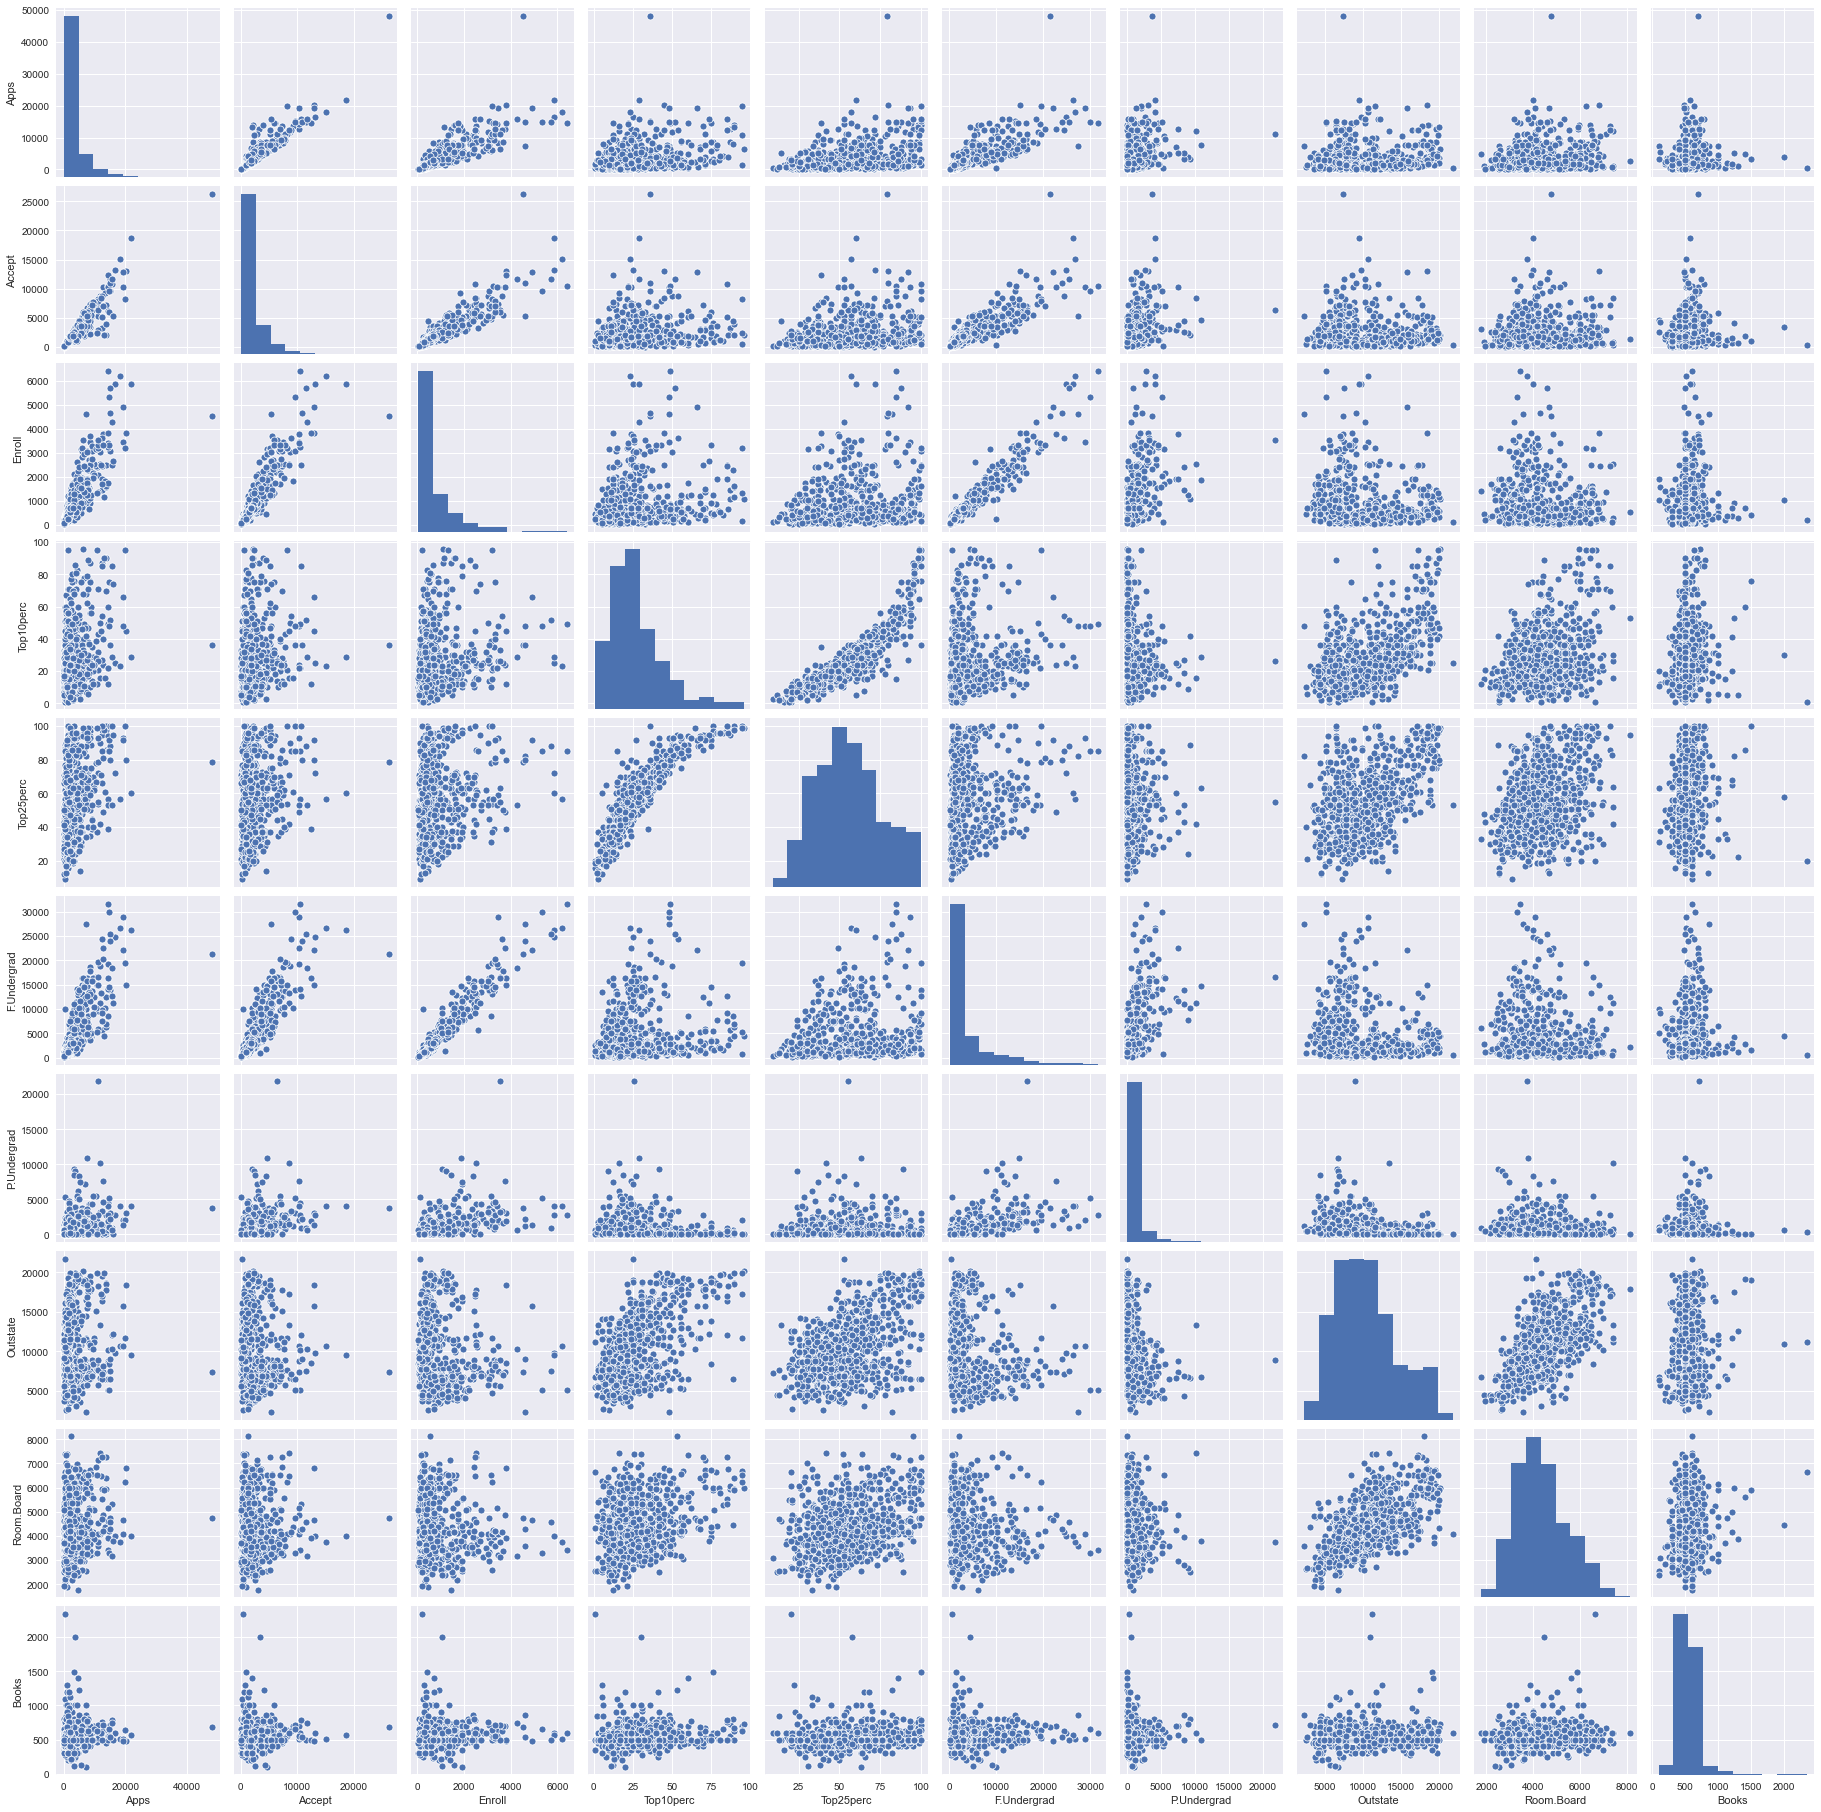

In [9]:
#pairplot of first 10 numerical columns
sns.pairplot(college, vars = college.columns[1:11].values);

# 8.c.iii Produce side-by-side boxplots of Outstate versus Private

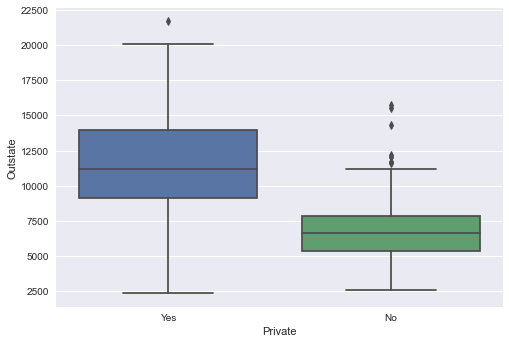

In [10]:
#横轴是类别型变量：横轴代表是私立学校还是公立学校，纵轴代表该学校的州外学生人数outstate.
#私立学校的州外学生人数显著高于公立学校的州外学生人数
sns.boxplot(x = 'Private', y = 'Outstate', data = college) 

# 8.c.iv

In [11]:
# 特征工程，创建新变量’精英学校‘ ，指标定义 ’Top10perc‘ > 50
#add new column with default value and set it 'yes' based on other column 
college['Elite'] = 'No'
college.loc[college['Top10perc'] > 50, 'Elite'] ='Yes'

In [12]:
college['Elite'].describe()

count     777
unique      2
top        No
freq      699
Name: Elite, dtype: object

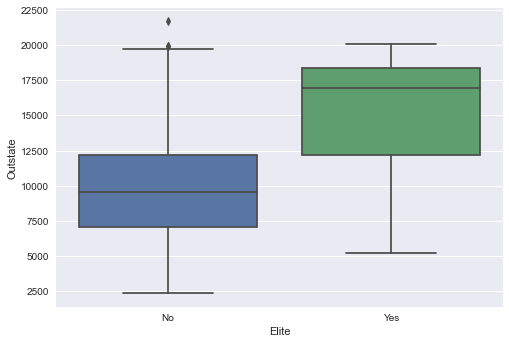

In [13]:
#查找精英学校和非精英学校的州外学生比例，发现精英学校的学生比例显著高于非精英学校
sns.boxplot(x='Elite',y='Outstate',data=college)

# 8.c.v 变量Apps, Top25perc, Books, Terminal的统计分布直方图

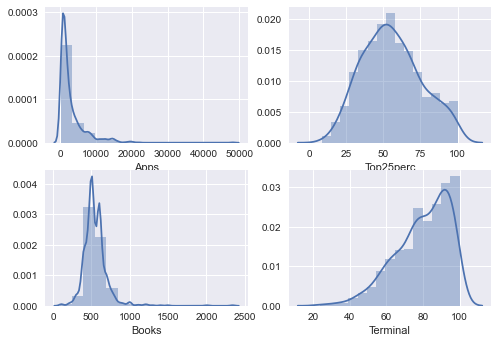

In [14]:
#add 2*2 matplot grid and plot 4 seaborn plots
f,axes=plt.subplots(2,2)
sns.distplot(college['Apps'],bins=15,ax=axes[0,0])
sns.distplot(college['Top25perc'],bins=15,ax=axes[0,1])
sns.distplot(college['Books'],bins=15,ax=axes[1,0])
sns.distplot(college['Terminal'],bins=15,ax=axes[1,1])

# 问题9 数据集Auto

# 9a #name是qualitative, 其他是quantitative

In [8]:

Auto=pd.read_csv('/Users/appler/Desktop/ISLR/Auto.csv', na_values=['?'])
Auto.dropna(axis=0, inplace=True) #去除空值，删除了5行
Auto['cylinders']=Auto['cylinders'].astype('category')
Auto.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 392 entries, 0 to 396
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype   
---  ------        --------------  -----   
 0   mpg           392 non-null    float64 
 1   cylinders     392 non-null    category
 2   displacement  392 non-null    float64 
 3   horsepower    392 non-null    float64 
 4   weight        392 non-null    int64   
 5   acceleration  392 non-null    float64 
 6   year          392 non-null    int64   
 7   origin        392 non-null    int64   
 8   name          392 non-null    object  
dtypes: category(1), float64(4), int64(3), object(1)
memory usage: 28.1+ KB


In [10]:
Auto.head(2)

mpg cylinders         displacement           horsepower  \
0                18.00         8               307.00               130.00   
1                15.00         8               350.00               165.00   

   weight         acceleration  year  origin                       name  
0    3504                12.00    70       1  chevrolet chevelle malibu  
1    3693                11.50    70       1          buick skylark 320

# 9b calculate ranges 计算每一列值的范围

In [16]:
ranges = Auto.describe().loc['max']-Auto.describe().loc['min']
pd.DataFrame(ranges, columns=['range']).transpose()

mpg         displacement           horsepower  \
range                37.60               387.00               184.00   

                    weight         acceleration                 year  \
range             3,527.00                16.80                12.00   

                    origin  
range                 2.00

# 9c 计算平均值和标准差

In [17]:
Auto.describe().loc[['mean','std']]

mpg         displacement           horsepower  \
mean                23.45               194.41               104.47   
std                  7.81               104.64                38.49   

                   weight         acceleration                 year  \
mean             2,977.58                15.54                75.98   
std                849.40                 2.76                 3.68   

                   origin  
mean                 1.58  
std                  0.81

# 9d计算subset 10%-85% 的range, mean, SD

In [18]:

Auto_subset = Auto.iloc[pd.np.r_[1:10,85:len(Auto)]]

<ipython-input-18-cf16dcdeaf69>:1: FutureWarning: The pandas.np module is deprecated and will be removed from pandas in a future version. Import numpy directly instead
  Auto_subset = Auto.iloc[pd.np.r_[1:10,85:len(Auto)]]


In [19]:
subset_desc = Auto_subset.describe().loc[['mean', 'std']]
subset_desc

mpg         displacement           horsepower  \
mean                24.39               187.50               100.91   
std                  7.88               100.10                36.02   

                   weight         acceleration                 year  \
mean             2,937.07                15.72                77.15   
std                812.30                 2.72                 3.11   

                   origin  
mean                 1.60  
std                  0.82

In [20]:
ranges_subset = Auto_subset.describe().loc['max']-Auto_subset.describe().loc['min']
ranges_df = pd.DataFrame(ranges_subset, columns=['range']).transpose()
ranges_df

mpg         displacement           horsepower  \
range                35.60               387.00               184.00   

                    weight         acceleration                 year  \
range             3,348.00                16.30                12.00   

                    origin  
range                 2.00

In [21]:
subset_desc=subset_desc.append(ranges_df)
subset_desc

mpg         displacement           horsepower  \
mean                 24.39               187.50               100.91   
std                   7.88               100.10                36.02   
range                35.60               387.00               184.00   

                    weight         acceleration                 year  \
mean              2,937.07                15.72                77.15   
std                 812.30                 2.72                 3.11   
range             3,348.00                16.30                12.00   

                    origin  
mean                  1.60  
std                   0.82  
range                 2.00

# 9e 画图 使用了matplotlib和seaborn两个包

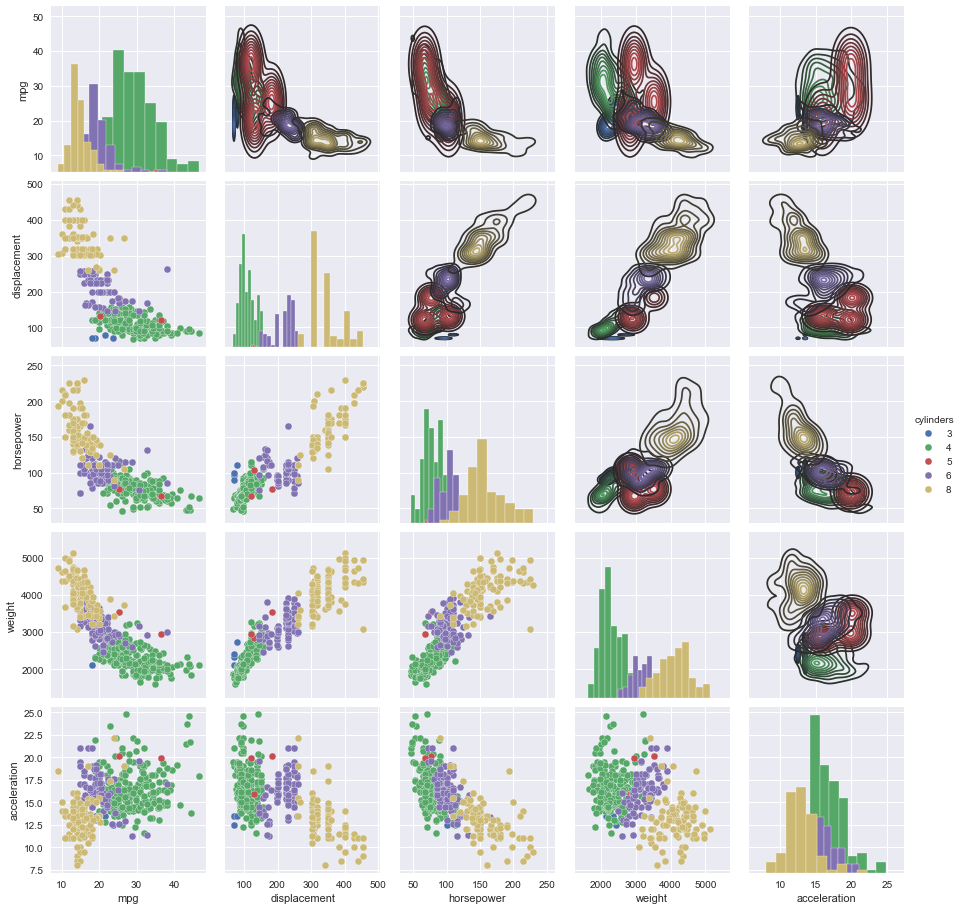

In [22]:
#画图 
g = sns.PairGrid(Auto, vars=['mpg','displacement','horsepower','weight','acceleration'],hue='cylinders')
g = g.map_diag(plt.hist,edgecolor='w') #对角线画histogram
g = g.map_upper(sns.kdeplot)  #使用seaborn在右上角画等高线图
g = g.map_lower(plt.scatter,edgecolor='w') #使用plt在左下角画散点图
g = g.add_legend()
#displacement, horsepower, and weight are negatively correlated with mpg. and cylinders play an effect. 
# weight & horsepower might have multicollinearity
#等高线图不太能看懂

# 10a Boston housing dataset

# Variables
There are 14 attributes in each case of the dataset. They are:

CRIM - per capita crime rate by town

ZN - proportion of residential land zoned for lots over 25,000 sq.ft.

INDUS - proportion of non-retail business acres per town.

CHAS - Charles River dummy variable (1 if tract bounds river; 0 otherwise)

NOX - nitric oxides concentration (parts per 10 million)

RM - average number of rooms per dwelling

AGE - proportion of owner-occupied units built prior to 1940

DIS - weighted distances to five Boston employment centres

RAD - index of accessibility to radial highways

TAX - full-value property-tax rate per $10,000

PTRATIO - pupil-teacher ratio by town

Bk - 1000(Bk - 0.63)^2 where Bk is the proportion of blacks by town

LSTAT - lower status of the population

MEDV - Median value of owner-occupied homes in $1000's

In [13]:
boston = pd.read_csv('/Users/appler/Desktop/ISLR/Boston.csv', index_col=0)
boston.head(2)
boston.shape

(506, 14)

In [14]:
boston.columns

Index(['crim', 'zn', 'indus', 'chas', 'nox', 'rm', 'age', 'dis', 'rad', 'tax',
       'ptratio', 'black', 'lstat', 'medv'],
      dtype='object')

# 10b make pairwise scatterplots

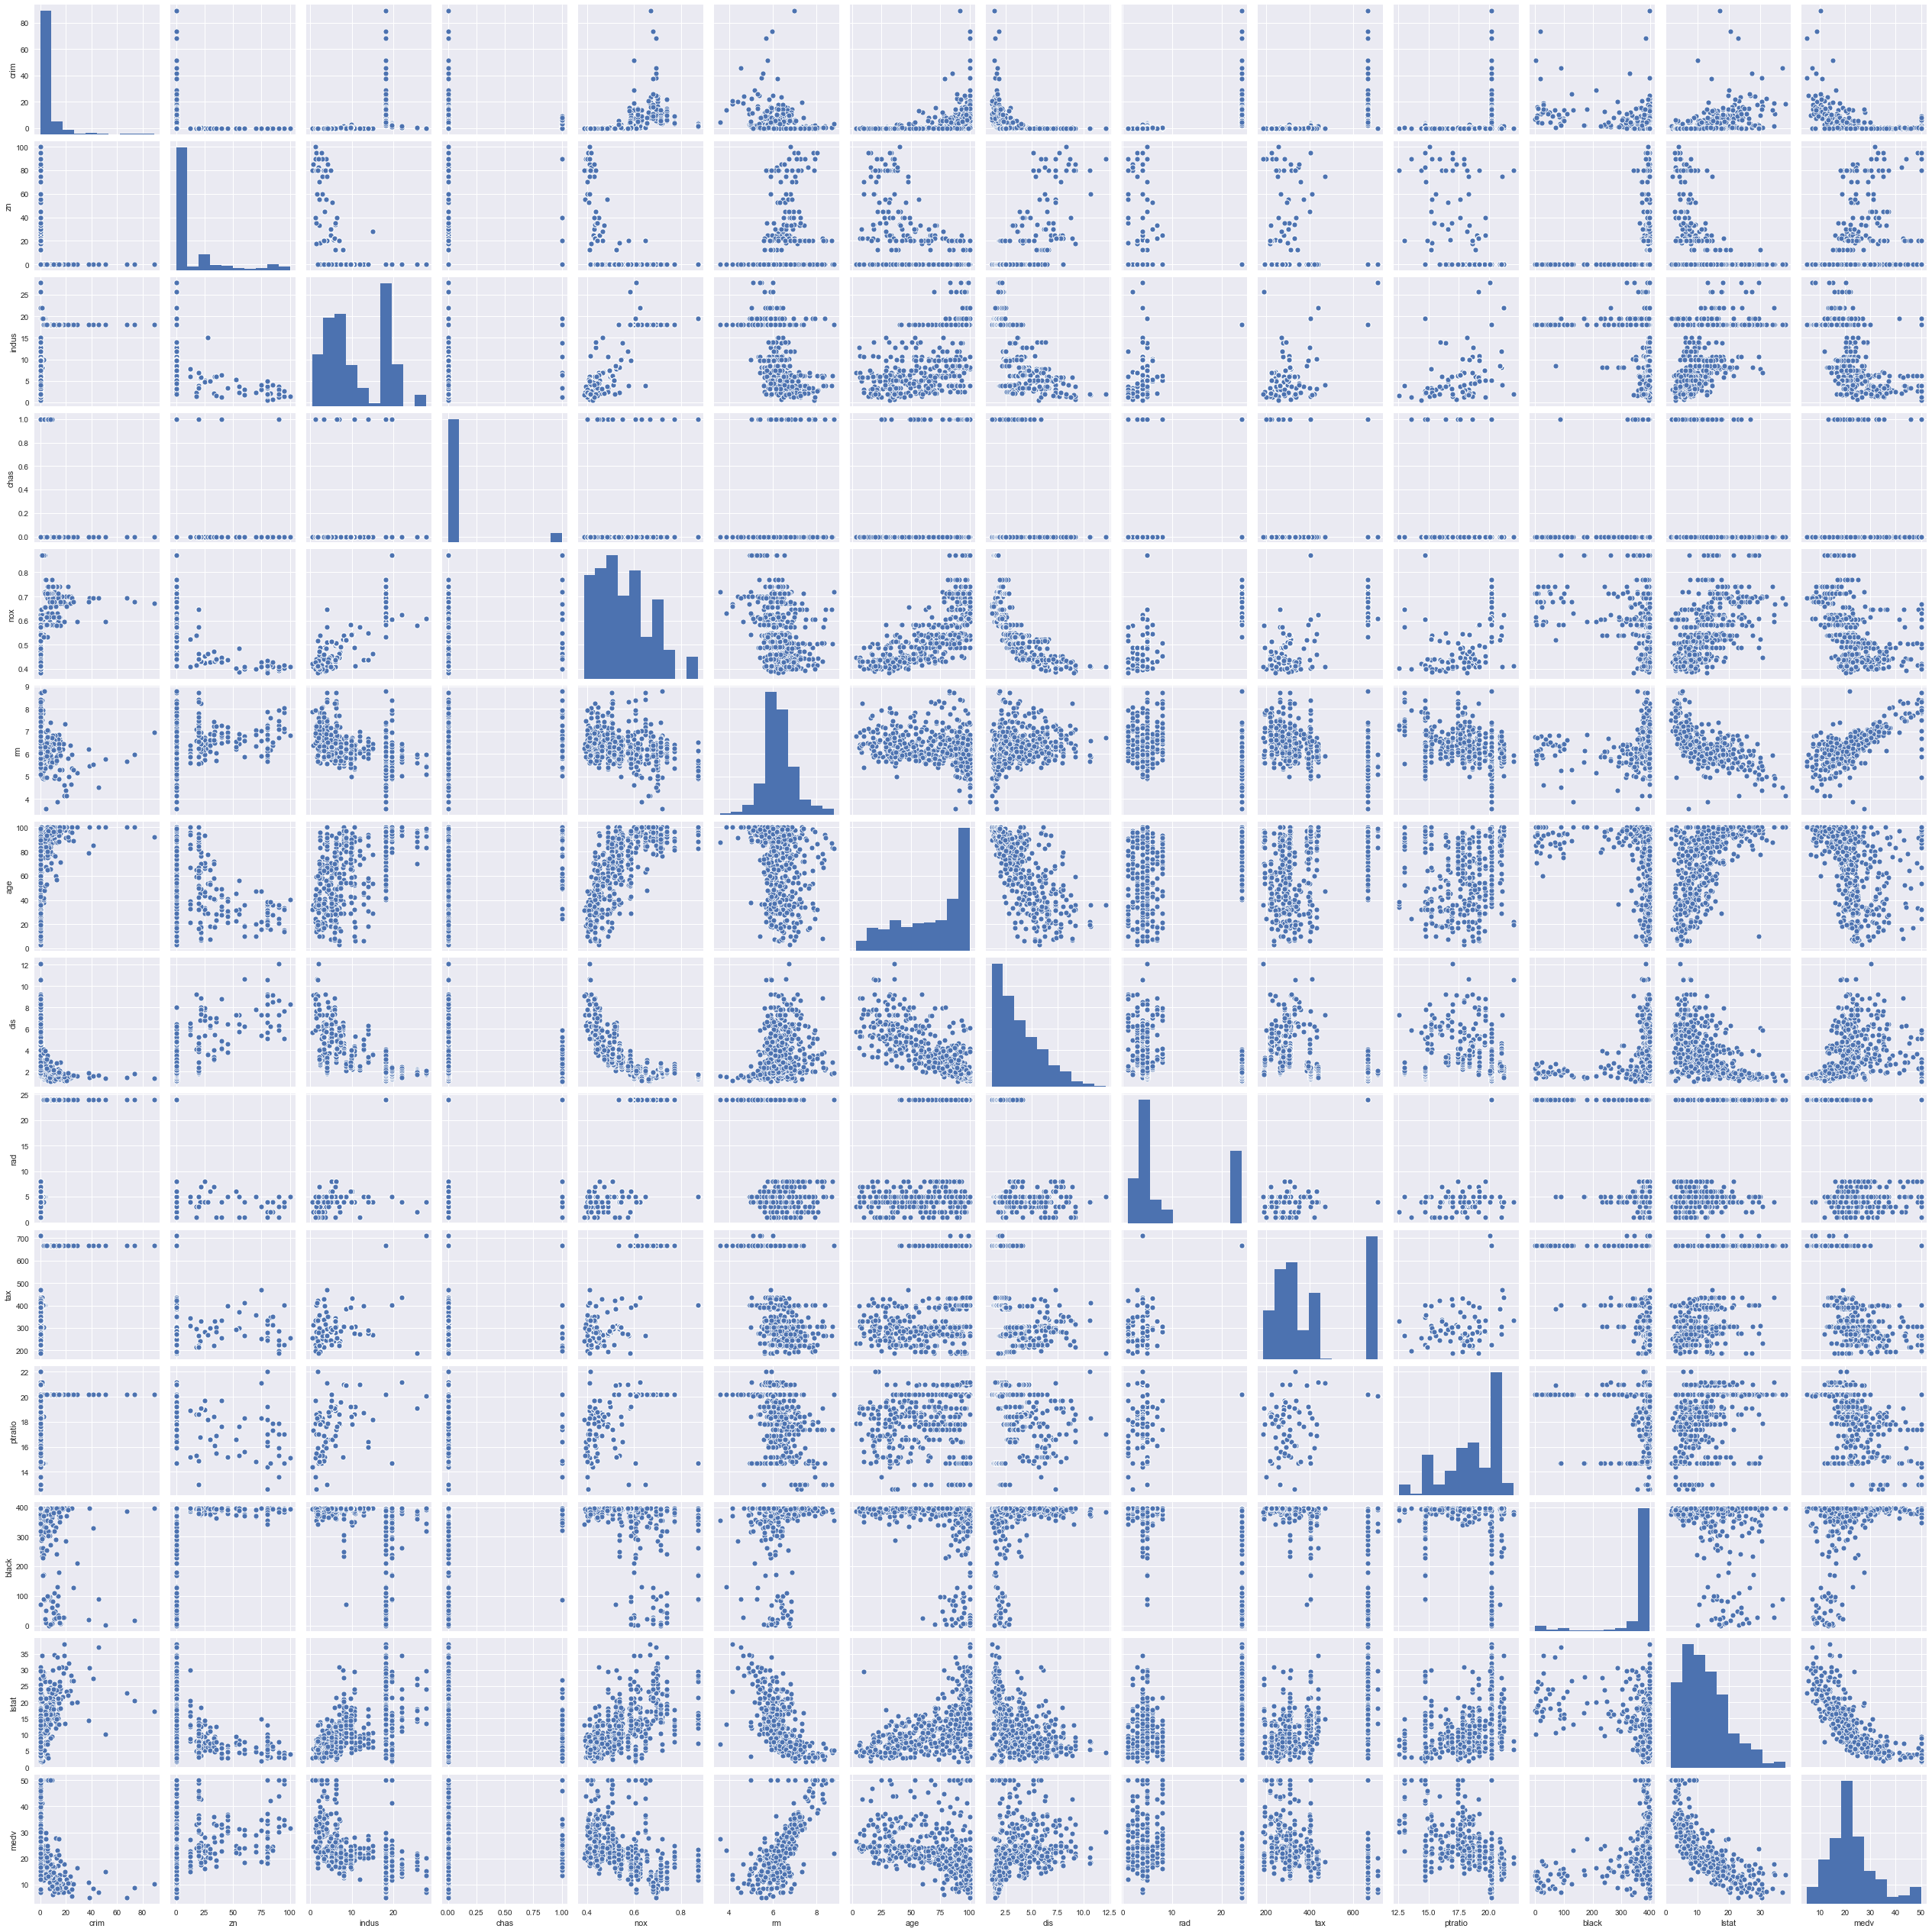

In [24]:
sns.pairplot(boston)
#medv and rm is positively correlated, linear feature observed
#medv and lstat is negatively corrlated, log feature observed

In [15]:
#10c are any of the observations correlated with per capita crime rate?
#tax

In [16]:
boston.head()

crim                   zn                indus  chas  \
1                 0.01                18.00                 2.31     0   
2                 0.03                 0.00                 7.07     0   
3                 0.03                 0.00                 7.07     0   
4                 0.03                 0.00                 2.18     0   
5                 0.07                 0.00                 2.18     0   

                   nox                   rm                  age  \
1                 0.54                 6.58                65.20   
2                 0.47                 6.42                78.90   
3                 0.47                 7.18                61.10   
4                 0.46                 7.00                45.80   
5                 0.46                 7.15                54.20   

                   dis  rad  tax              ptratio                black  \
1                 4.09    1  296                15.30               396.90   
2                 4.97    2  242                17.80               396.90   
3                 4.97    2  242                17.80               392.83   
4                 6.06    3  222                18.70               394.63   
5                 6.06    3  222                18.70               396.90   

                 lstat                 medv  
1                 4.98                24.00  
2                 9.14                21.60  
3                 4.03                34.70  
4                 2.94                33.40  
5                 5.33                36.20

# 10d

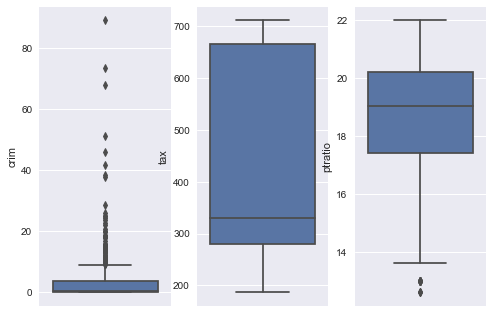

In [25]:
#add 1*3 matplot grid and 3 seaborn plots
f, axes = plt.subplots(1,3)
sns.boxplot(boston['crim'], orient='v', ax=axes[0])
sns.boxplot(boston['tax'], orient='v', ax=axes[1])
sns.boxplot(boston['ptratio'], orient='v', ax=axes[2])

In [26]:
boston[['crim','tax','ptratio']].describe()

crim                  tax              ptratio
count               506.00               506.00               506.00
mean                  3.61               408.24                18.46
std                   8.60               168.54                 2.16
min                   0.01               187.00                12.60
25%                   0.08               279.00                17.40
50%                   0.26               330.00                19.05
75%                   3.68               666.00                20.20
max                  88.98               711.00                22.00

In [27]:
boston[boston['crim'] > 50] #按照各个条件变量进行筛选，高犯罪率记录的行

crim                   zn                indus  chas  \
381                88.98                 0.00                18.10     0   
406                67.92                 0.00                18.10     0   
411                51.14                 0.00                18.10     0   
419                73.53                 0.00                18.10     0   

                     nox                   rm                  age  \
381                 0.67                 6.97                91.90   
406                 0.69                 5.68               100.00   
411                 0.60                 5.76               100.00   
419                 0.68                 5.96               100.00   

                     dis  rad  tax              ptratio                black  \
381                 1.42   24  666                20.20               396.90   
406                 1.43   24  666                20.20               384.97   
411                 1.41   24  666                20.20                 2.60   
419                 1.80   24  666                20.20                16.45   

                   lstat                 medv  
381                17.21                10.40  
406                22.98                 5.00  
411                10.11                15.00  
419                20.62                 8.80

In [28]:
boston[boston['tax'] > 700] #税高的行

crim                   zn                indus  chas  \
489                 0.15                 0.00                27.74     0   
490                 0.18                 0.00                27.74     0   
491                 0.21                 0.00                27.74     0   
492                 0.11                 0.00                27.74     0   
493                 0.11                 0.00                27.74     0   

                     nox                   rm                  age  \
489                 0.61                 5.45                92.70   
490                 0.61                 5.41                98.30   
491                 0.61                 5.09                98.00   
492                 0.61                 5.98                98.80   
493                 0.61                 5.98                83.50   

                     dis  rad  tax              ptratio                black  \
489                 1.82    4  711                20.10               395.09   
490                 1.76    4  711                20.10               344.05   
491                 1.82    4  711                20.10               318.43   
492                 1.87    4  711                20.10               390.11   
493                 2.11    4  711                20.10               396.90   

                   lstat                 medv  
489                18.06                15.20  
490                23.97                 7.00  
491                29.68                 8.10  
492                18.07                13.60  
493                13.35                20.10

In [29]:
boston[boston['ptratio'] > 21] #师生比高的行

crim                   zn                indus  chas  \
55                  0.01                75.00                 4.00     0   
128                 0.26                 0.00                21.89     0   
129                 0.33                 0.00                21.89     0   
130                 0.88                 0.00                21.89     0   
131                 0.34                 0.00                21.89     0   
..                   ...                  ...                  ...   ...   
140                 0.54                 0.00                21.89     0   
141                 0.29                 0.00                21.89     0   
142                 1.63                 0.00                21.89     0   
355                 0.04                80.00                 1.91     0   
356                 0.11                80.00                 1.91     0   

                     nox                   rm                  age  \
55                  0.41                 5.89                47.60   
128                 0.62                 5.69                96.00   
129                 0.62                 6.43                98.80   
130                 0.62                 5.64                94.70   
131                 0.62                 6.46                98.90   
..                   ...                  ...                  ...   
140                 0.62                 6.15                97.90   
141                 0.62                 6.17                93.60   
142                 0.62                 5.02               100.00   
355                 0.41                 5.66                21.90   
356                 0.41                 5.94                19.50   

                     dis  rad  tax              ptratio                black  \
55                  7.32    3  469                21.10               396.90   
128                 1.79    4  437                21.20               392.11   
129                 1.81    4  437                21.20               396.90   
130                 1.98    4  437                21.20               396.90   
131                 2.12    4  437                21.20               395.04   
..                   ...  ...  ...                  ...                  ...   
140                 1.67    4  437                21.20               396.90   
141                 1.61    4  437                21.20               388.08   
142                 1.44    4  437                21.20               396.90   
355                10.59    4  334                22.00               382.80   
356                10.59    4  334                22.00               376.04   

                   lstat                 medv  
55                 14.80                18.90  
128                17.19                16.20  
129                15.39                18.00  
130                18.34                14.30  
131                12.60                19.20  
..                   ...                  ...  
140                18.46                17.80  
141                24.16                14.00  
142                34.41                14.40  
355                 8.05                18.20  
356                 5.57                20.60  

[18 rows x 14 columns]

# 10.e

In [30]:
boston['chas'].value_counts() #计算变量chas的数值分布情况 35suburbs bound the Charles river

0    471
1     35
Name: chas, dtype: int64

## 10f the median pupil-teacher ratio

In [31]:
boston['ptratio'].median()

19.05

# 10g

In [17]:
medv_min=boston.nsmallest(1,'medv') #找最小值:suburb 399
medv_min

crim                   zn                indus  chas  \
399                38.35                 0.00                18.10     0   

                     nox                   rm                  age  \
399                 0.69                 5.45               100.00   

                     dis  rad  tax              ptratio                black  \
399                 1.49   24  666                20.20               396.90   

                   lstat                 medv  
399                30.59                 5.00

In [36]:
boston.describe(include='all').append(medv_min)
#compare to the average, the crime rate is 10 times higher than averge crime rate, the medv is <1/4 of average medv. 
#ptratio, black is similar, lstat is 3 times the average.

crim                   zn                indus  \
count               506.00               506.00               506.00   
mean                  3.61                11.36                11.14   
std                   8.60                23.32                 6.86   
min                   0.01                 0.00                 0.46   
25%                   0.08                 0.00                 5.19   
50%                   0.26                 0.00                 9.69   
75%                   3.68                12.50                18.10   
max                  88.98               100.00                27.74   
399                  38.35                 0.00                18.10   

                      chas                  nox                   rm  \
count               506.00               506.00               506.00   
mean                  0.07                 0.55                 6.28   
std                   0.25                 0.12                 0.70   
min                   0.00                 0.39                 3.56   
25%                   0.00                 0.45                 5.89   
50%                   0.00                 0.54                 6.21   
75%                   0.00                 0.62                 6.62   
max                   1.00                 0.87                 8.78   
399                   0.00                 0.69                 5.45   

                       age                  dis                  rad  \
count               506.00               506.00               506.00   
mean                 68.57                 3.80                 9.55   
std                  28.15                 2.11                 8.71   
min                   2.90                 1.13                 1.00   
25%                  45.02                 2.10                 4.00   
50%                  77.50                 3.21                 5.00   
75%                  94.07                 5.19                24.00   
max                 100.00                12.13                24.00   
399                 100.00                 1.49                24.00   

                       tax              ptratio                black  \
count               506.00               506.00               506.00   
mean                408.24                18.46               356.67   
std                 168.54                 2.16                91.29   
min                 187.00                12.60                 0.32   
25%                 279.00                17.40               375.38   
50%                 330.00                19.05               391.44   
75%                 666.00                20.20               396.23   
max                 711.00                22.00               396.90   
399                 666.00                20.20               396.90   

                     lstat                 medv  
count               506.00               506.00  
mean                 12.65                22.53  
std                   7.14                 9.20  
min                   1.73                 5.00  
25%                   6.95                17.02  
50%                  11.36                21.20  
75%                  16.96                25.00  
max                  37.97                50.00  
399                  30.59                 5.00

In [37]:
?nsmallest() 不明白msmallest这个function是干什么的函数

Object `nsmallest() 不明白msmallest这个function是干什么的函数` not found.


# 10h

In [38]:
boston[boston['rm']>8] #rm 每个住户的房屋数目>8 crime rate is much lower, others no significant difference

crim                   zn                indus  chas  \
98                  0.12                 0.00                 2.89     0   
164                 1.52                 0.00                19.58     1   
205                 0.02                95.00                 2.68     0   
225                 0.32                 0.00                 6.20     0   
226                 0.53                 0.00                 6.20     0   
..                   ...                  ...                  ...   ...   
254                 0.37                22.00                 5.86     0   
258                 0.61                20.00                 3.97     0   
263                 0.52                20.00                 3.97     0   
268                 0.58                20.00                 3.97     0   
365                 3.47                 0.00                18.10     1   

                     nox                   rm                  age  \
98                  0.45                 8.07                76.00   
164                 0.60                 8.38                93.90   
205                 0.42                 8.03                31.90   
225                 0.50                 8.27                78.30   
226                 0.50                 8.72                83.00   
..                   ...                  ...                  ...   
254                 0.43                 8.26                 8.40   
258                 0.65                 8.70                86.90   
263                 0.65                 8.40                91.50   
268                 0.57                 8.30                67.00   
365                 0.72                 8.78                82.90   

                     dis  rad  tax              ptratio                black  \
98                  3.50    2  276                18.00               396.90   
164                 2.16    5  403                14.70               388.45   
205                 5.12    4  224                14.70               390.55   
225                 2.89    8  307                17.40               385.05   
226                 2.89    8  307                17.40               382.00   
..                   ...  ...  ...                  ...                  ...   
254                 8.91    7  330                19.10               396.90   
258                 1.80    5  264                13.00               389.70   
263                 2.29    5  264                13.00               386.86   
268                 2.42    5  264                13.00               384.54   
365                 1.90   24  666                20.20               354.55   

                   lstat                 medv  
98                  4.21                38.70  
164                 3.32                50.00  
205                 2.88                50.00  
225                 4.14                44.80  
226                 4.63                50.00  
..                   ...                  ...  
254                 3.54                42.80  
258                 5.12                50.00  
263                 5.91                48.80  
268                 7.44                50.00  
365                 5.29                21.90  

[13 rows x 14 columns]

In [39]:
boston[boston['rm']>7] #rm 每个住户的房屋数目>7 low crime rate

crim                   zn                indus  chas  \
3                   0.03                 0.00                 7.07     0   
5                   0.07                 0.00                 2.18     0   
41                  0.03                75.00                 2.95     0   
56                  0.01                90.00                 1.22     0   
65                  0.02                17.50                 1.38     0   
..                   ...                  ...                  ...   ...   
365                 3.47                 0.00                18.10     1   
371                 6.54                 0.00                18.10     1   
376                19.61                 0.00                18.10     0   
454                 8.25                 0.00                18.10     0   
483                 5.73                 0.00                18.10     0   

                     nox                   rm                  age  \
3                   0.47                 7.18                61.10   
5                   0.46                 7.15                54.20   
41                  0.43                 7.02                15.80   
56                  0.40                 7.25                21.90   
65                  0.42                 7.10                59.50   
..                   ...                  ...                  ...   
365                 0.72                 8.78                82.90   
371                 0.63                 7.02                97.50   
376                 0.67                 7.31                97.90   
454                 0.71                 7.39                99.30   
483                 0.53                 7.06                77.00   

                     dis  rad  tax              ptratio                black  \
3                   4.97    2  242                17.80               392.83   
5                   6.06    3  222                18.70               396.90   
41                  5.40    3  252                18.30               395.62   
56                  8.70    5  226                17.90               395.93   
65                  9.22    3  216                18.60               393.24   
..                   ...  ...  ...                  ...                  ...   
365                 1.90   24  666                20.20               354.55   
371                 1.20   24  666                20.20               392.05   
376                 1.32   24  666                20.20               396.90   
454                 2.45   24  666                20.20               375.87   
483                 3.41   24  666                20.20               395.28   

                   lstat                 medv  
3                   4.03                34.70  
5                   5.33                36.20  
41                  1.98                34.90  
56                  4.81                35.40  
65                  8.05                33.00  
..                   ...                  ...  
365                 5.29                21.90  
371                 2.96                50.00  
376                13.44                15.00  
454                16.74                17.80  
483                 7.01                25.00  

[64 rows x 14 columns]